## Credit risk modeling

**What is credit risk?**<br>
-The possibility that a borrower will not repay their loan/ all of the money they borrowed.<br>
-The risk premium between buying a risk free security and lending someone money.<br>
-The likelihood that someone will default on their loan is called the probability of default (PD).<br>

**What is expected loss?**<br>
-Loss given default (LGD) is the % of the debt amount outstanding the lender will lose if the borrower defaults.<br>
-Exposure at default (EAD) is the dollar amount outstanding of debt at the time of default.<br>
-Expected loss (EL) = PD * LGD * EAD. The dollar loss the lender is expected to incur if the borrower defaults.<br>

**Building a logistic regression model to predict the probability of default**<br>
-Data exploration and visualisation.<br>
-Dealing with missing data, detecting and removing outliers.<br>
-Dealing with non-numeric models (One-hot encoding, Weight of Evidence, Information Value).<br>
-Training and testing the model.<br>
-Interpreting the LR model's coefficients and making predictions.<br>
-Model performance:<br>
--Accuracy scores.<br>
--Receiver Operating Characteristics (ROC) curve and Area Under the Curve (AUC).<br>
--Classification report metrics (Recall, Precision, F1 score).<br>
--Confusion matrix.<br>

**Gradient boosted trees model with XGBoost**<br>
-Creating and training trees.<br>
-Setting hyperparameters of gradient boosted trees.<br>
-Selecting columns (features) based on their importance.<br>
-Cross validation set up (and how it works).<br>
-Use undersampling to overcome sample imbalances.<br>

**Model evaluation**<br>
-Comparing classification reports, ROC and AUC.<br>
-Model calibration curve and interpretation.<br>
-Thresholds, acceptance rate, bad rate.<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cr_loan = pd.read_csv('assets/cr_loan2.csv')

### Explore the dataset

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


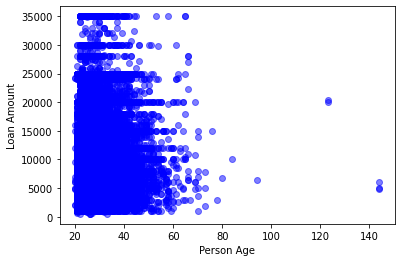

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


None

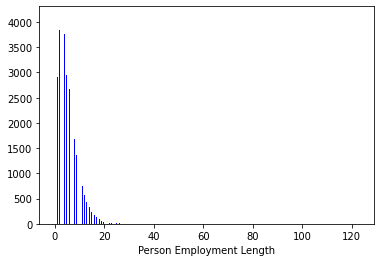

In [3]:
# Check the structure of the data
display(cr_loan.dtypes)

# Check the first five rows of the data
display(cr_loan.head())

# Create a cross table of the loan intent and loan status
display(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

# Create the cross table for loan status, home ownership, and the max employment length
display(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max'))

# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

# Print rows that contain missing data
display(cr_loan[cr_loan.isnull().any(axis=1)])

# Print the top five rows with nulls for employment length
display(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Impute the null values with the median value for all employment lengths
display(cr_loan['person_emp_length'].fillna(cr_loan['person_emp_length'].median(), inplace=True))

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

### Clean data, remove rows with missing data

In [4]:
# Print the number of nulls
display(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3116

### Calculate weight of evidence and information value

**Weight of Evidence**<br>
-WoE indicates the predictive power of an independent variable in relation to the dependent variable. It is generally described as a measure of the separation of (good) non-defaulted and (bad) defaulted customers.<br>
-WoE = ln(% of good loans /% of bad loans) or ln(% of non-events/% of events).<br>
-For a continuous variable, split the data into groups. Categorical variables are already split.<br>
-Calculate the number of events and non-events in each group (bin). Calculate the % of events and % of non-events in each group. Calculate WOE by taking natural log of division of % of non-events and % of events.<br>
-Combine categories with similar WOE and then create new categories of an independent variable with continuous WOE values. In other words, use WOE values rather than raw categories in your model.<br>

**Information Value**<br>
-IV is calculated as the sum of the difference of the % of non-events minus the % of events, multipled by each group's WoE.
-IV is a comprehensive measure of the predictive power of the independent variable. 
nformation Value	Variable Predictiveness
>Less than 0.02	Not useful for prediction<br>
>0.02 to 0.1	Weak predictive Power<br>
>0.1 to 0.3	Medium predictive Power<br>
>0.3 to 0.5	Strong predictive Power<br>
>Higher than 0.5	Suspicious Predictive Power<br>


**In the end we select not to use WoE to any columns**<br>

-https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

In [5]:
drop_ind = cr_loan_clean[cr_loan_clean['person_age']>70].index
cr_loan_clean = cr_loan_clean.drop(drop_ind)

cr_loan_clean['age_buckets'] = pd.cut(cr_loan_clean['person_age'],[0,25,30,35,40,45,1000000],
                           labels=['<25','25-30','30-35','35-40','40-45','>45'])

In [6]:
woe_tab = pd.crosstab(cr_loan_clean['age_buckets'],
            cr_loan_clean['loan_status'])
woe_tab['% of non-events'] = woe_tab[0]/woe_tab[0].sum()
woe_tab['% of events'] = woe_tab[1]/woe_tab[1].sum()

woe_tab['WoE'] = np.log(woe_tab['% of non-events']/woe_tab['% of events'])
woe_tab['IV'] = woe_tab['WoE'] * ( woe_tab['% of non-events']-woe_tab['% of events'] )
woe_tab.loc['Sum'] = woe_tab.sum()
woe_tab.loc['Sum','WoE'] = '-'
woe_tab


loan_status,0,1,% of non-events,% of events,WoE,IV
age_buckets,,,,,,
<25,10691.0,3214.0,0.465008,0.497215,-0.066969,0.002157
25-30,6752.0,1806.0,0.293680,0.279394,0.04987,0.000712
30-35,3112.0,794.0,0.135357,0.122834,0.097083,0.001216
35-40,1396.0,369.0,0.060719,0.057085,0.061715,0.000224
40-45,599.0,156.0,0.026054,0.024134,0.076551,0.000147
>45,441.0,125.0,0.019181,0.019338,-0.008123,0.000001
Sum,22991.0,6464.0,1.000000,1.000000,-,0.004458


In [7]:
cr_loan_clean = cr_loan_clean.drop('age_buckets',axis=1)

### One hot encoding non-numeric data

In [8]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_clean = pd.concat([cred_num, cred_str_onehot], axis=1)

In [9]:
cred_str_onehot

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
32577,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
32578,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
32579,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


### Logistic regression model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

In [11]:
cr_loan_clean

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
# Create the X and y data sets
y = cr_loan_clean[['loan_status']]
X = cr_loan_clean.drop('loan_status',axis=1)

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[-4.39900298e-08 -4.08071621e-05 -2.30887632e-08  1.07228938e-04
   9.89645149e-08  2.60858383e-09 -5.57970210e-09 -6.14206892e-09
   7.39112004e-11 -4.15012139e-09  8.44572218e-09  2.40574049e-09
  -3.15603820e-09  1.55383696e-09  2.04635878e-09 -1.04480473e-09
  -3.57765024e-09 -1.04636181e-08 -5.95176797e-09 -1.37660082e-09
   1.08890236e-08  3.70124057e-09  1.01989373e-09  4.09272054e-10
  -8.35829811e-09  6.58574117e-09]]


### Logistic regression model predictions

In [13]:
# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# non_default and default probabilities
display(preds)

array([[0.62180484, 0.37819516],
       [0.79641752, 0.20358248],
       [0.56442833, 0.43557167],
       ...,
       [0.66673823, 0.33326177],
       [0.34261409, 0.65738591],
       [0.96885141, 0.03114859]])

In [14]:
# 0: non_default | 1: default
y_test.head(15)

,loan_status
7121,0
32010,0
9782,1
20503,0
6491,0
198,1
30753,0
14610,0
24795,0
12695,0


In [15]:
# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:15], columns = ['prob_default'])
true_df = y_test.head(15)

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

    loan_status  prob_default
0             0  3.781952e-01
1             0  2.035825e-01
2             1  4.355717e-01
3             0  3.085086e-01
4             0  3.341947e-01
5             1  4.562089e-01
6             0  2.849837e-01
7             0  1.884203e-02
8             0  8.346619e-02
9             0  2.033125e-01
10            0  2.993451e-01
11            0  3.812998e-01
12            0  4.517166e-07
13            1  2.612077e-01
14            0  2.996225e-01


### Logistic regression model performance


**Accuracy**<br>

**Precision**<br>

**Recall**<br>

**F1-score**<br>

**ROC & AUC**<br>
-In ROC charts, the X and Y axes are the false positive rate (fall-out), and the true positive rate (sensitivity).

**Confusion matrix**<br>
-TP = predicted a default and it was a default<br>
-TN = predicted a non-default and it was a non-default<br>
-FP = predicted a default but it was a non-default<br>
-FN = predicted a non-default but it was a default<br>
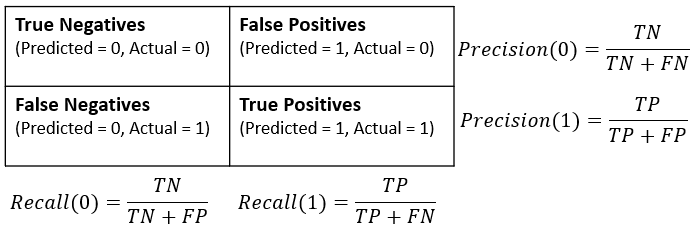

In [16]:
# Create a dataframe for the probabilities of default - Reassign loan status based on the threshold
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report | y_test: actual results vs  preds_df['loan_status']: predicted results
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    11216
1      566
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.99      0.89      9192
     Default       0.76      0.17      0.27      2590

    accuracy                           0.81     11782
   macro avg       0.79      0.58      0.58     11782
weighted avg       0.80      0.81      0.75     11782



In [17]:
# You can have the same results (precision, recall, f1-score) with precision_recall_fscore_support
precision_recall_fscore_support(y_test, preds_df['loan_status'])

(array([0.80759629, 0.76325088]),
 array([0.98542211, 0.16679537]),
 array([0.8876911 , 0.27376426]),
 array([9192, 2590]))

In [18]:
# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

0.8054659650314039


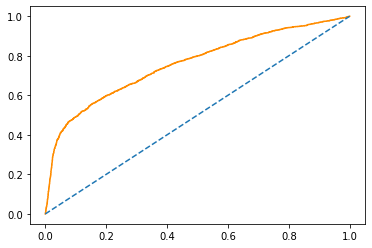

0.7586300492958458

In [19]:
# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)
auc

In [20]:
# Set the threshold for defaults to 0.5
# What this means is - if prob of default is larger than x, set loan status to default, else to non_defailt
preds_df['loan_status_0'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0 else 0)
preds_df['loan_status_3'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.3 else 0)
preds_df['loan_status_5'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)
preds_df['loan_status_7'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.7 else 0)
preds_df['loan_status_10'] = preds_df['prob_default'].apply(lambda x: 1 if x > 1 else 0)

# Print the confusion matrix
print('Catches all defaults, but has too many false positives (i.e. says status is default but it\'s really a non-default')
print(confusion_matrix(y_test, preds_df['loan_status_0']))
print('----')
print(confusion_matrix(y_test, preds_df['loan_status_3'])) 
print(confusion_matrix(y_test, preds_df['loan_status_5']))
print(confusion_matrix(y_test, preds_df['loan_status_7']))
print('----')
print('Catches all non-defaults, but has too many false negatives (i.e. says status is non-default but it\'s really a default)')
print(confusion_matrix(y_test, preds_df['loan_status_10'])) 

Catches all defaults, but has too many false positives (i.e. says status is default but it's really a non-default
[[   0 9192]
 [   0 2590]]
----
[[7015 2177]
 [ 976 1614]]
[[9058  134]
 [2158  432]]
[[9185    7]
 [2578   12]]
----
Catches all non-defaults, but has too many false negatives (i.e. says status is non-default but it's really a default)
[[9192    0]
 [2590    0]]


In [21]:
def recall_by_threshold(thre):
    # Reassign the values of loan status based on the new threshold
    testT = preds_df['prob_default'].apply(lambda x: 1 if x > thre else 0)
    
    # Store the number of loan defaults from the prediction data
    #num_defaults = testT.value_counts()[1]
    
    # Calculate the estimated impact of the new default recall rate
    # print(avg_loan_amnt * num_defaults * (1 - default_recall))
    
    # Store the default and non_default recall from the classification report
    default_recall     = precision_recall_fscore_support(y_test, testT)[1][1]
    non_default_recall = precision_recall_fscore_support(y_test, testT)[0][1]
    acc_score = 1#clf_logistic.score(preds_df['loan_status'], y_test)
    
    return default_recall, non_default_recall, acc_score

0.0
0.047619047619047616
0.09523809523809523
0.14285714285714285
0.19047619047619047
0.23809523809523808
0.2857142857142857
0.3333333333333333
0.38095238095238093
0.42857142857142855
0.47619047619047616
0.5238095238095238
0.5714285714285714
0.6190476190476191
0.6666666666666666
0.7142857142857143
0.7619047619047619
0.8095238095238095
0.8571428571428571
0.9047619047619048


/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


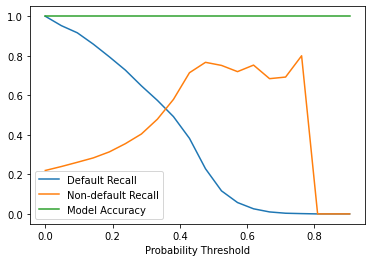

In [22]:
thresh = [i/105 for i in range(0,100,5)]
def_recalls = []
nondef_recalls = []
accs = []

for i in thresh:
    print(i)
    def_rec, ndef_rec, ac_score = recall_by_threshold(i)
    def_recalls.append(def_rec)
    nondef_recalls.append(ndef_rec)
    accs.append(ac_score)
    
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
# plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

### Gradient Boosted Trees Using XGBoost


In [23]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:46:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   loan_status  prob_default
0            0      0.000593
1            0      0.006015
2            1      0.996771
3            0      0.163910
4            0      0.000149


In [24]:
# Check the values created by the predict method
gbt_preds = clf_gbt.predict(X_test)

print(gbt_preds)
print(y_test)


# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[0 0 1 ... 0 1 0]
       loan_status
7121             0
32010            0
9782             1
20503            0
6491             0
...            ...
11444            0
24400            0
2526             0
32578            1
6964             0

[11782 rows x 1 columns]
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9192
     Default       0.94      0.74      0.83      2590

    accuracy                           0.93     11782
   macro avg       0.94      0.86      0.89     11782
weighted avg       0.93      0.93      0.93     11782



{'loan_percent_income': 258,
 'loan_int_rate': 494,
 'person_income': 741,
 'loan_intent_HOMEIMPROVEMENT': 52,
 'loan_grade_D': 50,
 'person_home_ownership_RENT': 58,
 'loan_intent_DEBTCONSOLIDATION': 45,
 'person_emp_length': 263,
 'loan_grade_C': 55,
 'loan_intent_MEDICAL': 80,
 'person_home_ownership_OWN': 49,
 'person_age': 266,
 'loan_intent_VENTURE': 33,
 'loan_intent_EDUCATION': 48,
 'person_home_ownership_MORTGAGE': 52,
 'loan_amnt': 342,
 'loan_grade_E': 19,
 'loan_grade_G': 13,
 'cb_person_default_on_file_N': 33,
 'person_home_ownership_OTHER': 4,
 'cb_person_cred_hist_length': 186,
 'loan_intent_PERSONAL': 19,
 'loan_grade_B': 24,
 'loan_grade_F': 6,
 'loan_grade_A': 2}

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

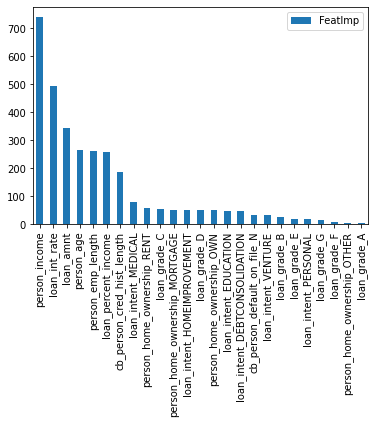

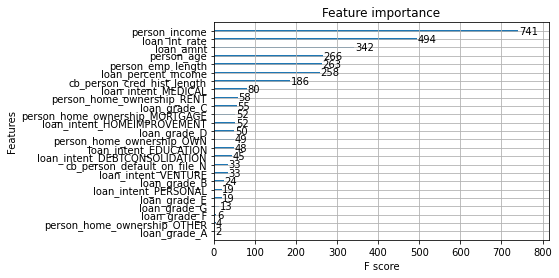

In [25]:
# Print the column importances from the model
imp =  clf_gbt.get_booster().get_score(importance_type = 'weight')
pd.DataFrame(index=imp.keys(),data=imp.values(),columns=['FeatImp']
            ).sort_values(by='FeatImp',ascending=False).plot(kind='bar')

display(imp)


# or use:
display(xgb.plot_importance(clf_gbt, importance_type = 'weight'))


### Cross-validation
-Tries several smaller training and test sets which are derived from the original X_train and y_train.<br>
-XGBoost uses cv() to perform cross-validation.

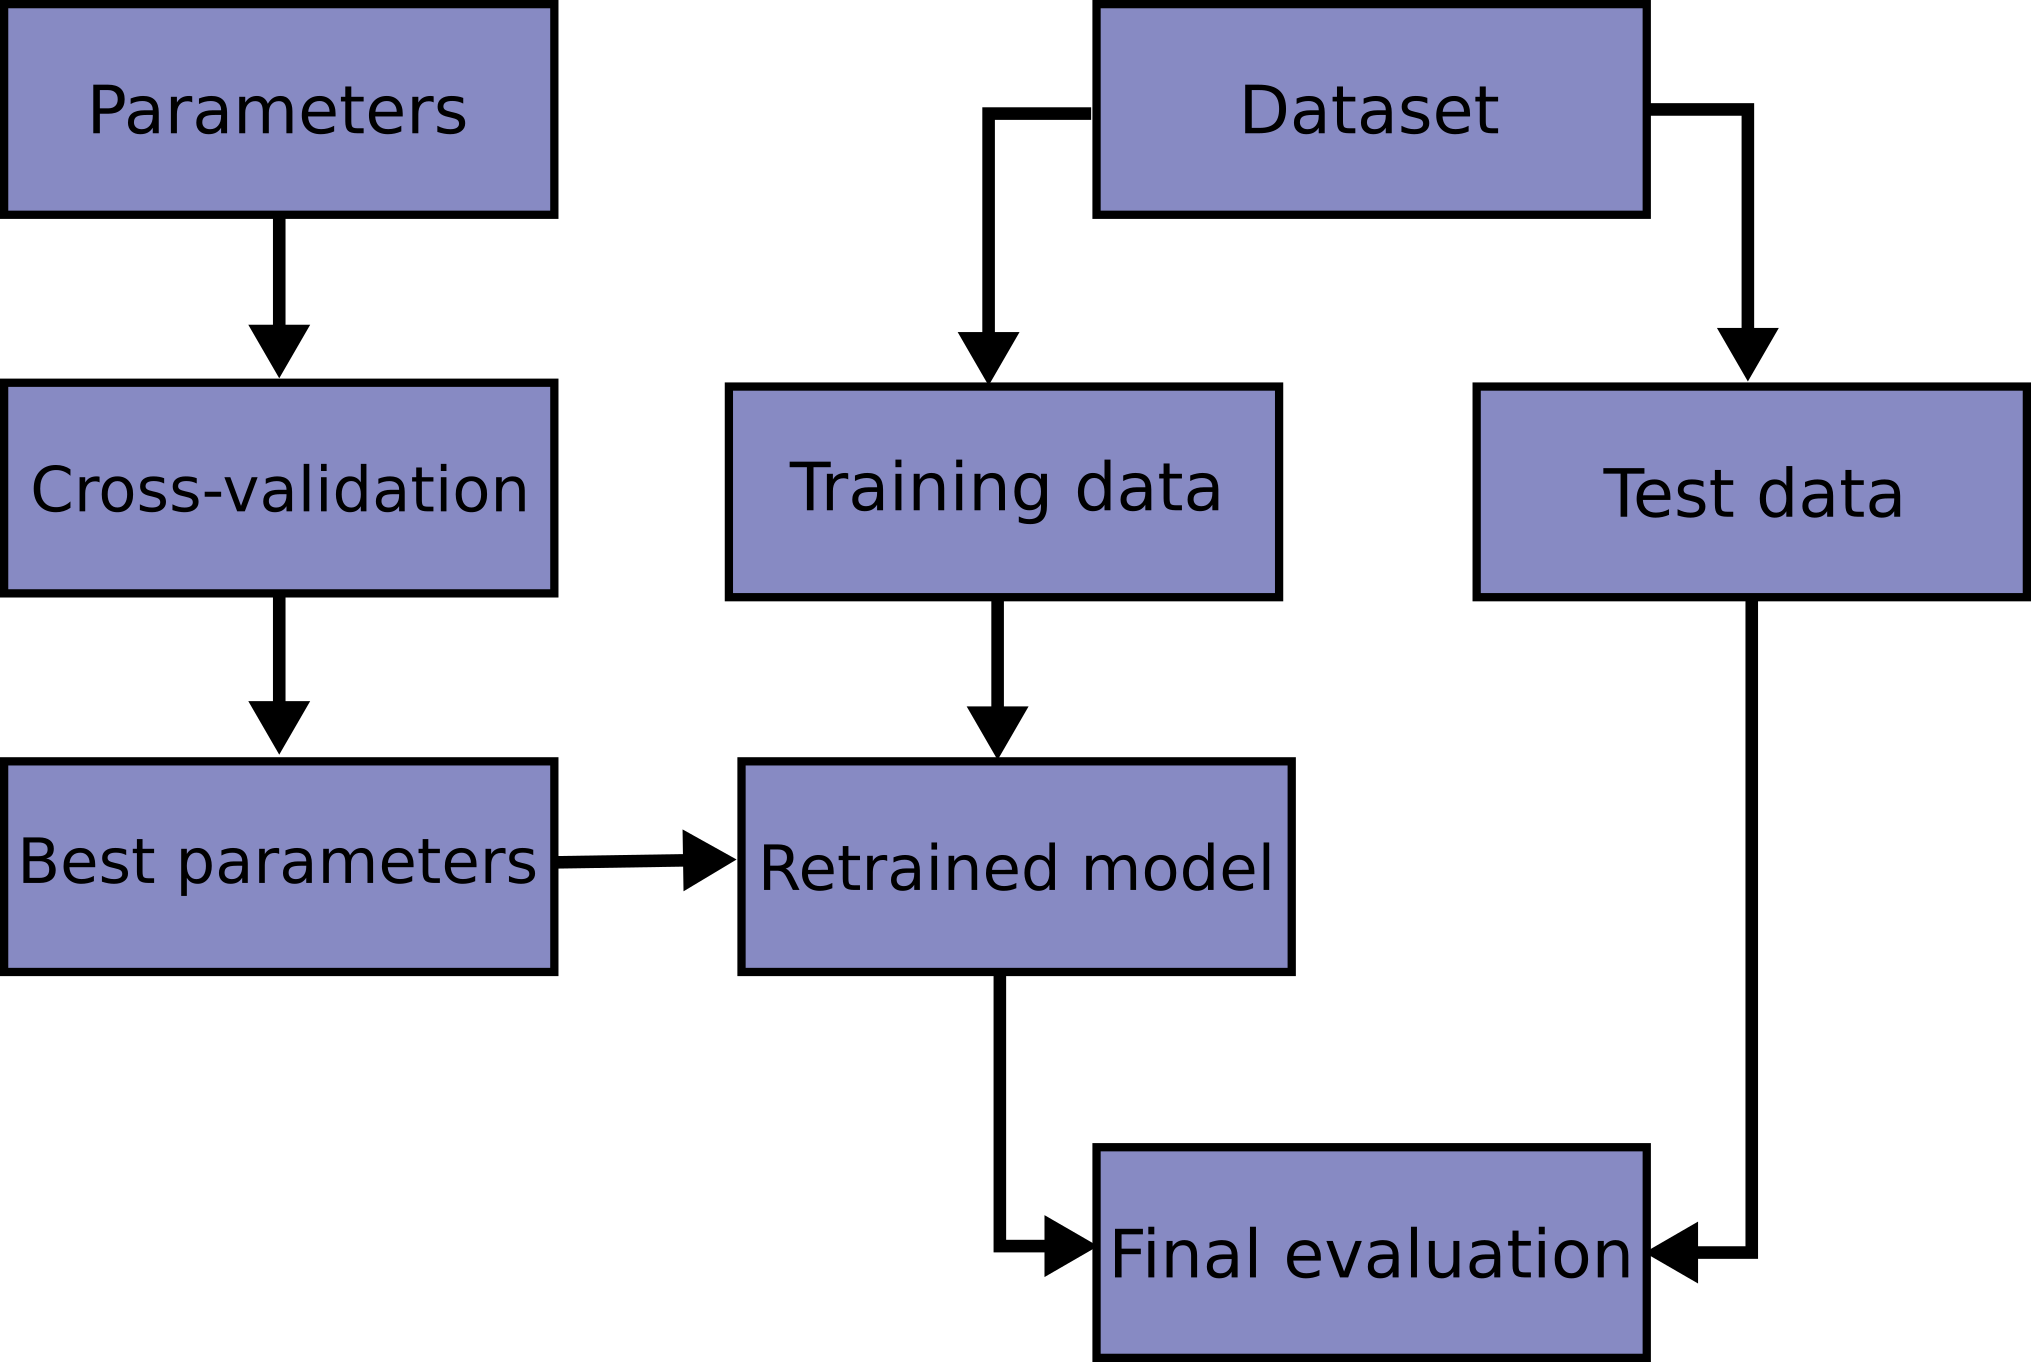

In [26]:
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10
params = {'eval_metric': 'auc', 'objective': 'binary:logistic', 'seed': 123}

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params,
               DTrain,
               num_boost_round = 5,
               nfold=n_folds,
               early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.902007       0.001828       0.895874      0.004110
1        0.909946       0.002069       0.903961      0.007033
2        0.915424       0.000896       0.908648      0.006627
3        0.918485       0.000506       0.910214      0.005853
4        0.923023       0.001199       0.912546      0.005679


### Limits of cross-validation

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.900979       0.001465       0.894652      0.012575
1        0.910525       0.001490       0.903505      0.010167
2        0.914825       0.001365       0.909245      0.010237
3        0.918446       0.001517       0.910816      0.009756
4        0.922647       0.001199       0.914658      0.009487
0.9438750328333331


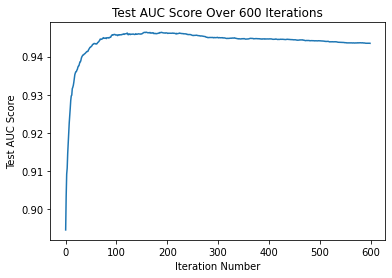

In [27]:
# Limits of cross-validation
cv_results_big = xgb.cv(params, DTrain, num_boost_round = 600, nfold=10, shuffle = True)


# Print the first five rows of the CV results data frame
print(cv_results_big.head())

# Calculate the mean of the test AUC scores
print(np.mean(cv_results_big['test-auc-mean']))

# Plot the test AUC scores for each iteration
plt.plot(cv_results_big['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

### Cross-validation scoring

-Use cross_val_score() to check the overall performance.<br>
-Test out the use of the hyperparameters learning_rate and max_depth for optimum performance.

https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (np.mean(cv_scores), np.std(cv_scores) * 2))

[19:47:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:47:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.93595836 0.93571752 0.9298325  0.93594387]
Average accuracy: 0.93 (+/- 0.01)


### Model comparison

-Use roc_curve

[19:47:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


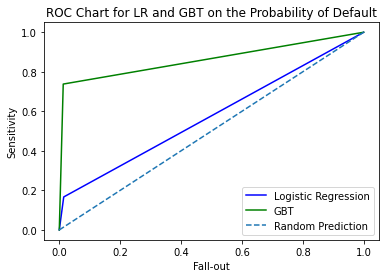

In [30]:
# Logistic regression
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))
clf_logistic_preds = clf_logistic.predict(X_test)

# XGBoost trees
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))
clf_gbt_preds = clf_gbt.predict(X_test)

# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, clf_logistic_preds)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, clf_gbt_preds)

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

### Model calibration

-Tthe gradient boosted tree clf_gbt has the best overall performance. Now check the calibration of the two models to see how stable the default prediction performance is across probabilities. You can use a chart of each model's calibration to check this by calling the calibration_curve() function.<br>

https://scikit-learn.org/stable/modules/calibration.html#calibration

In [31]:
from sklearn.calibration import calibration_curve

In [32]:
clf_logistic.predict_proba(X_test)

array([[0.62180484, 0.37819516],
       [0.79641752, 0.20358248],
       [0.56442833, 0.43557167],
       ...,
       [0.66673823, 0.33326177],
       [0.34261409, 0.65738591],
       [0.96885141, 0.03114859]])

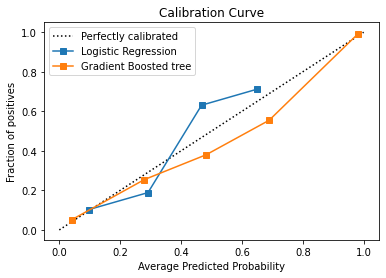

In [33]:
frac_of_pos_lr, mean_pred_val_lr = calibration_curve(y_test,
                                                     clf_logistic.predict_proba(X_test)[:,1],
                                                     n_bins = 5)

frac_of_pos_gbt, mean_pred_val_gbt = calibration_curve(y_test,
                                                       clf_gbt.predict_proba(X_test)[:,1],
                                                       n_bins = 5)


# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    

plt.plot(mean_pred_val_lr, frac_of_pos_lr, 's-', label='%s' % 'Logistic Regression')

plt.plot(mean_pred_val_gbt, frac_of_pos_gbt, 's-', label='%s' % 'Gradient Boosted tree')

plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')

plt.legend()

plt.title('Calibration Curve')
plt.show()

### Setting thresholds - acceptance / rejection rate - good / bad loans

-Set an acceptance rate and calculate the threshold for that rate to set the percentage of new loans to accept.<br>

-With acceptance rate in mind, you can now analyze the bad rate within the accepted loans. This way you will be able to see the percentage of defaults that have been accepted. Think about the impact of the acceptance rate and bad rate. We set an acceptance rate to have fewer defaults in the portfolio because defaults are more costly. Will the bad rate be less than the percentage of defaults in the test data?

In [63]:
lg_pred_default_prob = pd.DataFrame(clf_logistic.predict_proba(X_test)[:,1],columns=['prob_default'])
lg_pred_default_prob['true_loan_status'] = y_test.reset_index()['loan_status']

In [65]:
# Check the statistics of the probabilities of default
print(lg_pred_default_prob['prob_default'].describe().round(3))

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(lg_pred_default_prob['prob_default'], 0.85)

# Apply acceptance rate threshold
lg_pred_default_prob['pred_loan_status'] = lg_pred_default_prob['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(lg_pred_default_prob['pred_loan_status'].value_counts())

count    11782.000
mean         0.231
std          0.153
min          0.000
25%          0.105
50%          0.216
75%          0.341
max          0.785
Name: prob_default, dtype: float64
0    10014
1     1768
Name: pred_loan_status, dtype: int64


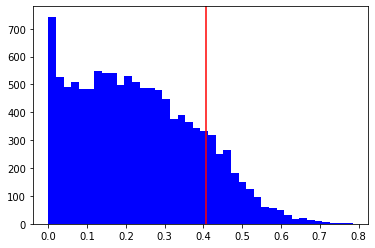

In [66]:
# Plot the predicted probabilities of default
plt.hist(lg_pred_default_prob['prob_default'], color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(lg_pred_default_prob['prob_default'], 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

In [71]:
# Print the top 5 rows of the new data frame
print(lg_pred_default_prob.head())

# Create a subset of only accepted loans
accepted_loans = lg_pred_default_prob[lg_pred_default_prob['pred_loan_status'] == 0]

# Calculate the bad rate
print('true_loan_status: ' + str(np.sum(accepted_loans['true_loan_status']) / accepted_loans['true_loan_status'].count()))

# print('pred_loan_status: '+ str(np.sum(lg_pred_default_prob['pred_loan_status']) / lg_pred_default_prob['pred_loan_status'].count()))

   prob_default  true_loan_status  pred_loan_status
0      0.378195                 0                 0
1      0.203582                 0                 0
2      0.435572                 1                 1
3      0.308509                 0                 0
4      0.334195                 0                 0
true_loan_status: 0.14349910125823848
pred_loan_status: 0.15005941266338482


In [78]:
accept_rates = [i/100 for i in range(0,105,5)]

lg_pred_default_prob = pd.DataFrame(clf_logistic.predict_proba(X_test)[:,1],columns=['prob_default'])
lg_pred_default_prob['true_loan_status'] = y_test.reset_index()['loan_status']

### Strategy table

In [82]:
# Populate the arrays for the strategy table with a for loop
bad_rates = []
thresholds = []
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(lg_pred_default_prob['prob_default'], rate).round(3)

    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(lg_pred_default_prob['prob_default'], rate).round(3))
    
    # Reassign the loan_status value using the threshold
    lg_pred_default_prob['pred_loan_status'] = lg_pred_default_prob['prob_default'].apply(lambda x: 1 if x > thresh else 0)

    # Create a set of accepted loans using this acceptance rate
    accepted_loans = lg_pred_default_prob[lg_pred_default_prob['pred_loan_status'] == 0]

    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status']) / len(accepted_loans['true_loan_status'])).round(3))

# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
display(strat_df)

,Acceptance Rate,Threshold,Bad Rate
0,0.00,0.000,0.000
1,0.05,0.014,0.086
2,0.10,0.036,0.082
3,0.15,0.059,0.077
4,0.20,0.082,0.077
5,0.25,0.105,0.081
6,0.30,0.129,0.087
7,0.35,0.150,0.094
8,0.40,0.171,0.099
9,0.45,0.194,0.102
